In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from numba import njit

In [2]:
# initialize
n = 5 # grid length (once squared)
eta = 1 # shape parameter 
domain = np.zeros((n, n))
domain[n-1, n//2]=1
contour = np.copy(domain)
contour[n-1, n//2]=2
print(contour)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0.]]


In [3]:
@njit
def update_contour(candidate_loc, contour):
    n = len(contour)
    x = candidate_loc[0]
    y = candidate_loc[1]
    contour[x, y] = 1
    neighbours = []
    if x > 0:
        neighbours.append([x-1, y])
    if y > 0:
        neighbours.append([x, y-1])
    if x < n-1:
        neighbours.append([x+1, y])
    if y < n-1:
        neighbours.append([x, y+1])
    for neigh in neighbours:
        if contour[neigh[0], neigh[1]] != 1:
            contour[neigh[0], neigh[1]] = 2
    candidates = [[x, y] for x in range(0,n) for y in range(0,n) if contour[x,y] == 2]
    return contour, candidates

@njit
def aggregate_candidate(candidates):
    agg_cand = np.random.choice(candidates)
    return agg_cand

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[938, 494], [939, 493], [939, 495], [940, 480], [940, 482], [940, 485], [940, 491], [940, 492], [940, 496], [941, 479], [941, 481], [941, 483], [941, 484], [941, 486], [941, 489], [941, 490], [941, 497], [942, 478], [942, 483], [942, 484], [942, 487], [942, 488], [942, 490], [942, 498], [942, 508], [942, 509], [942, 511], [942, 515], [942, 520], [943, 475], [943, 479], [943, 486], [943, 487], [943, 488], [943, 495], [943, 496], [943, 499], [943, 506], [943, 507], [943, 510], [943, 512], [943, 513], [943, 514], [943, 516], [943, 519], [943, 521], [944, 474], [944, 476], [944, 477], [944, 478], [944, 483], [944, 484], [944, 485], [944, 486], [944, 488], [944, 494], [944, 496], [944, 498], [944, 505], [944, 510], [944, 512], [944, 516], [944, 518], [944, 519], [944, 521], [945, 474], [945, 480], [945, 481], [945, 484], [945, 486], [94

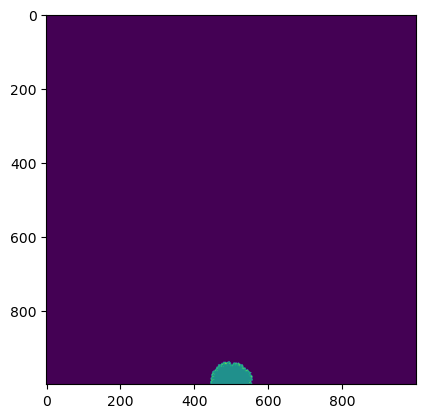

In [20]:
n = 1000
contour = np.zeros((n,n))
candidates = [[n-1, n//2]] # initial cluster point

for _ in range(5000):
    candidates_array = np.array(candidates)
    if candidates_array.any():
        cand = candidates_array[np.random.randint(len(candidates_array))]
    else:
        break
    contour, candidates = update_contour(cand, contour)
print(contour, candidates)
im = plt.imshow(contour)
plt.show()